Projeto - Aplicação de Redes Neurais
Objetivo: O aluno deverá ser capaz de realizar uma análise completa dos 
dados e projetar uma rede neural para resolver o problema. Avaliar os 
resultados obtidos através das métricas de classificação

Problema: De posse de dados que correspondem a sinais de transitórios 
de eletrodomésticos (sinais obtidos em uma janela de 2s ao se ligar 
equipamento) e que foram rotulados em 7 diferentes classes, o aluno 
deverá realizar os seguintes passos: 
1) Carregar os dados e realizar a limpeza dos dados (se necessário) 
2) Visualizar os dados para compreensão (dica: plotar 1 exemplo de cada 
Classe). Como na Figura 1 , abaixo, que representa um 
eletrodoméstico da Classe 1.
3) Como é um problema muticlasse, o aluno deverá transformar os 
labels para uma representação correta.
4) Preparar os dados para se apresentados à ML 
5) Construir a rede neural com seus respectivos parâmetros (taxa de 
aprendizado, número de camadas intermediárias, número de 
neurônios, batch_size etc). O aluno deve propor uma estratégia para 
determinar esses parâmetros. 
6) Testar e validar os resultados 
7) Avaliar o usa de PCA (Análise de Componentes Principais) para 
visualização dos dados e também como speed-up da ML (para fins de 
classificação).
8) Conclusão 

obs.: Esses dados estão desatualizados, não necessariamente 
representam os eletrodomésticos atuais. Mas, esses estudos ainda são 
atuais e continuam usando recursos de IA em suas soluções. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt


import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

1 - Carregar os dados e realizar a limpeza dos dados:

In [2]:
file = 'db.csv'
df = pd.read_csv(file)
df

t0     t1     t2     t3     t4     t5     t6     t7     t8     t9  ...  \
0   24.00  24.00  23.00  25.00  24.00  25.00  24.00  24.00  22.00  25.00  ...   
1   23.00  23.00  22.00  21.00  21.00  22.00  23.00  23.00  22.00  21.00  ...   
2   -0.55  -0.55  -0.55   3.45  13.45  11.45  18.45  18.45  20.45  20.45  ...   
3   12.30  10.30  15.30  15.30  16.30  15.30  17.30  16.30  17.30  15.30  ...   
4   24.85   2.85   5.85  -1.15   2.85  -1.15   1.85  -1.15   0.85  -1.15  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95  14.70   4.70   2.70  -0.30   0.70   0.70   2.70   1.70   1.70   0.70  ...   
96  11.55   5.55   2.55   1.55   0.55   1.55   0.55   0.55  -0.45   0.55  ...   
97  14.35   4.35   1.35   2.35  -0.65   0.35   0.35   1.35   0.35   0.35  ...   
98  22.70  -5.30  -0.30  -5.30  -1.30  -3.30  -1.30  -3.30  -2.30  -3.30  ...   
99  -5.30  -6.30  -6.30  -6.30  -5.30  -3.30  -4.30  -6.30  -6.30  -4.30  ...   

    t191  t192  t193  t194  t195  t196  t197  t198  t199  Classes  
0   1.00 -1.00  1.00 -1.00  1.00  0.00  1.00  0.00  0.00        1  
1  -1.00  1.00  0.00  1.00 -1.00  0.00 -1.00  1.00  0.00        1  
2  -0.55  0.45 -0.55  0.45 -0.55  0.45 -0.55  0.45 -0.55        1  
3  -0.70  0.30 -0.70  0.30 -0.70  1.30 -0.70  1.30 -0.70        1  
4  -0.15  0.85 -1.15 -0.15 -1.15  0.85 -0.15  0.85 -0.15        2  
..   ...   ...   ...   ...   ...   ...   ...   ...   ...      ...  
95 -0.30 -0.30 -0.30  0.70 -0.30  0.70 -1.30 -1.30 -0.30        5  
96  0.55 -0.45  0.55 -1.45  0.55 -0.45  0.55 -0.45  0.55        6  
97 -0.65  0.35 -0.65  0.35 -1.65  0.35  0.35  0.35 -0.65        6  
98 -2.30  1.70 -1.30  1.70 -0.30  0.70 -2.30  0.70 -1.30        7  
99 -0.30  0.70 -1.30 -0.30  2.70  1.70 -0.30 -0.30 -0.30        7  

[100 rows x 201 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 201 entries, t0 to Classes
dtypes: float64(200), int64(1)
memory usage: 157.2 KB


In [4]:
df.describe()

t0          t1          t2          t3          t4          t5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    11.114000    7.974000    8.154000    7.334000    7.374000    6.834000   
std     10.187807    9.012776    8.899937    8.958318    8.458134    8.301816   
min    -10.150000   -6.300000   -6.300000   -6.300000   -5.300000   -3.500000   
25%      0.650000    0.450000    0.700000    0.450000    0.650000    0.450000   
50%     11.925000    5.575000    4.950000    4.300000    3.600000    3.050000   
75%     21.250000   14.900000   17.450000   16.950000   14.900000   13.000000   
max     25.850000   25.450000   26.200000   25.200000   25.200000   25.000000   

               t6          t7          t8          t9  ...        t191  \
count  100.000000  100.000000  100.000000  100.000000  ...  100.000000   
mean     7.134000    6.874000    7.054000    6.594000  ...    0.114000   
std      8.230796    8.317599    8.269182    7.937996  ...    2.253057   
min     -4.300000   -6.300000   -6.300000   -4.300000  ...   -2.500000   
25%      0.600000    0.850000    0.650000    0.650000  ...   -0.700000   
50%      3.300000    3.325000    3.225000    3.850000  ...   -0.300000   
75%     14.000000   13.000000   11.950000   10.950000  ...    0.300000   
max     24.200000   25.200000   26.200000   25.200000  ...   13.550000   

            t192        t193        t194        t195        t196       t197  \
count  100.00000  100.000000  100.000000  100.000000  100.000000  100.00000   
mean    -0.14600   -0.146000    0.154000    0.014000    0.374000   -0.20600   
std      0.86292    0.829497    1.009442    1.114779    0.969548    0.78757   
min     -2.40000   -2.050000   -2.500000   -2.150000   -2.500000   -2.30000   
25%     -0.75000   -0.700000   -0.550000   -0.800000   -0.100000   -0.70000   
50%     -0.07500   -0.200000    0.275000   -0.075000    0.400000   -0.32500   
75%      0.45000    0.550000    0.700000    0.700000    0.850000    0.35000   
max      1.70000    1.500000    2.650000    3.500000    3.800000    1.35000   

             t198        t199     Classes  
count  100.000000  100.000000  100.000000  
mean    -0.146000   -0.186000    3.140000  
std      1.046004    0.838411    1.608186  
min     -2.500000   -2.050000    1.000000  
25%     -0.750000   -0.700000    2.000000  
50%     -0.025000   -0.275000    3.000000  
75%      0.450000    0.250000    4.000000  
max      1.850000    2.500000    7.000000  

[8 rows x 201 columns]

In [5]:
# Groupby da coluna target

df.groupby('Classes')['Classes'].count()

Classes
1    16
2    22
3    30
4     8
5    16
6     4
7     4
Name: Classes, dtype: int64

In [6]:
#Verificando a existencia de valores Nulos
pd.isnull(df)

t0     t1     t2     t3     t4     t5     t6     t7     t8     t9  ...  \
0   False  False  False  False  False  False  False  False  False  False  ...   
1   False  False  False  False  False  False  False  False  False  False  ...   
2   False  False  False  False  False  False  False  False  False  False  ...   
3   False  False  False  False  False  False  False  False  False  False  ...   
4   False  False  False  False  False  False  False  False  False  False  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95  False  False  False  False  False  False  False  False  False  False  ...   
96  False  False  False  False  False  False  False  False  False  False  ...   
97  False  False  False  False  False  False  False  False  False  False  ...   
98  False  False  False  False  False  False  False  False  False  False  ...   
99  False  False  False  False  False  False  False  False  False  False  ...   

     t191   t192   t193   t194   t195   t196   t197   t198   t199  Classes  
0   False  False  False  False  False  False  False  False  False    False  
1   False  False  False  False  False  False  False  False  False    False  
2   False  False  False  False  False  False  False  False  False    False  
3   False  False  False  False  False  False  False  False  False    False  
4   False  False  False  False  False  False  False  False  False    False  
..    ...    ...    ...    ...    ...    ...    ...    ...    ...      ...  
95  False  False  False  False  False  False  False  False  False    False  
96  False  False  False  False  False  False  False  False  False    False  
97  False  False  False  False  False  False  False  False  False    False  
98  False  False  False  False  False  False  False  False  False    False  
99  False  False  False  False  False  False  False  False  False    False  

[100 rows x 201 columns]

In [7]:
# Determinando quantos valores não nulos existem em cada coluna, 
# e se todas as colunas têm a mesma contagem de valores não nulos.
df.describe().loc['count'].unique()

array([100.])

In [8]:
# O valor acima significa que todas as colunas do DataFrame têm exatamente 100 valores não nulos.

In [9]:
#Alterando os nomes das colunas 

df.columns = [s.replace("t","") for s in df.columns]
df

0      1      2      3      4      5      6      7      8      9  ...  \
0   24.00  24.00  23.00  25.00  24.00  25.00  24.00  24.00  22.00  25.00  ...   
1   23.00  23.00  22.00  21.00  21.00  22.00  23.00  23.00  22.00  21.00  ...   
2   -0.55  -0.55  -0.55   3.45  13.45  11.45  18.45  18.45  20.45  20.45  ...   
3   12.30  10.30  15.30  15.30  16.30  15.30  17.30  16.30  17.30  15.30  ...   
4   24.85   2.85   5.85  -1.15   2.85  -1.15   1.85  -1.15   0.85  -1.15  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95  14.70   4.70   2.70  -0.30   0.70   0.70   2.70   1.70   1.70   0.70  ...   
96  11.55   5.55   2.55   1.55   0.55   1.55   0.55   0.55  -0.45   0.55  ...   
97  14.35   4.35   1.35   2.35  -0.65   0.35   0.35   1.35   0.35   0.35  ...   
98  22.70  -5.30  -0.30  -5.30  -1.30  -3.30  -1.30  -3.30  -2.30  -3.30  ...   
99  -5.30  -6.30  -6.30  -6.30  -5.30  -3.30  -4.30  -6.30  -6.30  -4.30  ...   

     191   192   193   194   195   196   197   198   199  Classes  
0   1.00 -1.00  1.00 -1.00  1.00  0.00  1.00  0.00  0.00        1  
1  -1.00  1.00  0.00  1.00 -1.00  0.00 -1.00  1.00  0.00        1  
2  -0.55  0.45 -0.55  0.45 -0.55  0.45 -0.55  0.45 -0.55        1  
3  -0.70  0.30 -0.70  0.30 -0.70  1.30 -0.70  1.30 -0.70        1  
4  -0.15  0.85 -1.15 -0.15 -1.15  0.85 -0.15  0.85 -0.15        2  
..   ...   ...   ...   ...   ...   ...   ...   ...   ...      ...  
95 -0.30 -0.30 -0.30  0.70 -0.30  0.70 -1.30 -1.30 -0.30        5  
96  0.55 -0.45  0.55 -1.45  0.55 -0.45  0.55 -0.45  0.55        6  
97 -0.65  0.35 -0.65  0.35 -1.65  0.35  0.35  0.35 -0.65        6  
98 -2.30  1.70 -1.30  1.70 -0.30  0.70 -2.30  0.70 -1.30        7  
99 -0.30  0.70 -1.30 -0.30  2.70  1.70 -0.30 -0.30 -0.30        7  

[100 rows x 201 columns]

In [10]:
# preparando para o plot dos histogramas
def plot_histograma(dataframe, features):
  
    
    # Configuração do estilo Seaborn (opcional)
    sns.set(style="whitegrid")

    # Configuração do layout dos subplots
    num_plots = len(features)
    num_cols = 2  # Defina o número desejado de colunas
    num_rows = -(-num_plots // num_cols)  # Cálculo de linhas necessárias

    # Configuração do tamanho do gráfico
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    # Certifica-se de que axes é sempre um array, mesmo que num_plots seja 1
    if num_plots == 1:
        axes = [axes]

    # Itera sobre as colunas e plota os histogramas
    for col, ax in zip(features, [item for sublist in axes for item in sublist]):
        sns.histplot(dataframe[col], ax=ax, kde=True)
        ax.set_title(f'Histograma de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequência')

    # Ajusta o layout final
    plt.tight_layout()
    plt.show()

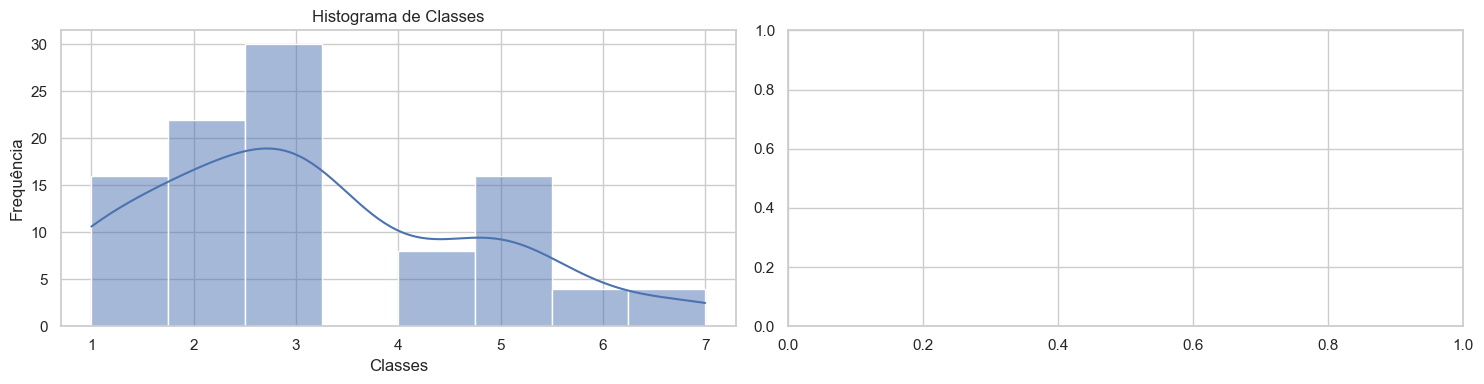

In [11]:
plot_histograma(df, ['Classes'])


In [12]:
# plotando gráfico de todas as features

plot_histograma(df, df.columns)

In [13]:
# Verificando linhas duplicadas

duplicadas = df[df.duplicated()]

duplicadas

0      1      2      3      4      5      6      7      8      9  ...  \
29  24.00  24.00  23.00  25.00  24.00  25.00  24.00  24.00  22.00  25.00  ...   
30  23.00  23.00  22.00  21.00  21.00  22.00  23.00  23.00  22.00  21.00  ...   
32  -0.55  -0.55  -0.55   3.45  13.45  11.45  18.45  18.45  20.45  20.45  ...   
33  12.30  10.30  15.30  15.30  16.30  15.30  17.30  16.30  17.30  15.30  ...   
34  15.10  15.10  22.10  23.10  22.10  21.10  14.10  23.10  23.10  23.10  ...   
35  -2.50  -2.50  -3.50  -3.50  -3.50  -3.50  -2.50   2.50  11.50   9.50  ...   
36  19.20  17.20  26.20  25.20  25.20  23.20  24.20  25.20  26.20  25.20  ...   
37  15.90  14.90  22.90  24.90  24.90  22.90  22.90  21.90  24.90  22.90  ...   
42  24.85   2.85   5.85  -1.15   2.85  -1.15   1.85  -1.15   0.85  -1.15  ...   
43  -0.35  -0.35   0.65  -0.35   0.65  -0.35  -0.35  -0.35   0.65  -0.35  ...   
44   0.45   0.45   1.45   0.45   1.45   0.45   1.45   0.45   1.45   0.45  ...   
45   4.90   5.90   6.90   4.90   3.90   2.90   3.90   3.90   4.90   3.90  ...   
46   0.10   0.10  -0.90   0.10   0.10   0.10   0.10  -0.90  -0.90   0.10  ...   
49   0.65   0.65   0.65  -1.35  -0.35  -0.35   1.65  -0.35   0.65  -1.35  ...   
50   0.60  -0.40   0.60  -1.40   0.60   0.60   0.60  -0.40   0.60  -1.40  ...   
51   2.70   2.70   0.70   0.70   0.70   2.70   1.70   1.70  -0.30  -0.30  ...   
52  -0.40   1.60   0.60   0.60   0.60  -0.40  -1.40   1.60   0.60   1.60  ...   
53   1.15  -0.85   0.15   0.15   0.15  -0.85   0.15  -0.85   1.15  -0.85  ...   
54 -10.15  -1.15  -1.15   0.85  -0.15   0.85  -0.15   0.85  -0.15   0.85  ...   
61  14.30  11.30   8.30   8.30   8.30   8.30   8.30   7.30   6.30   6.30  ...   
62  15.25   4.25   8.25   4.25   8.25   5.25   6.25   5.25   5.25   5.25  ...   
63   3.55   6.55   4.55   6.55   6.55   5.55   3.55   5.55   3.55   5.55  ...   
64  23.50  21.50  21.50  18.50  16.50  14.50  14.50   8.50   2.50   7.50  ...   
65  22.45  21.45  21.45  19.45  17.45  18.45  19.45  18.45  18.45  15.45  ...   
66  11.20   8.20   9.20   9.20   9.20   8.20   7.20   7.20   8.20   8.20  ...   
67  -5.05  -2.05   3.95   0.95   2.95   0.95  -0.05   0.95   1.95   0.95  ...   
70  23.95  18.95  17.95  16.95  13.95  10.95  13.95  11.95  11.95  10.95  ...   
71  19.80  14.80  13.80  12.80   9.80   8.80   7.80   4.80   5.80   3.80  ...   
72  21.25  19.25  20.25  18.25  18.25  15.25  14.25  15.25  16.25  16.25  ...   
73  -4.95  25.05  24.05  22.05  21.05  22.05  21.05  20.05  15.05  12.05  ...   
74  24.00  22.00  20.00  17.00  15.00  13.00  14.00  13.00  13.00  10.00  ...   
75  14.65   8.65  10.65  10.65   8.65   9.65  10.65   9.65  11.65   9.65  ...   
76   7.75   0.75   0.75   1.75   0.75   1.75   0.75   1.75   0.75   1.75  ...   
77  -0.55  -0.55  -0.55  -0.55  -0.55   1.45   4.45   3.45   8.45   7.45  ...   
80   9.65  -1.35   2.65  -1.35   0.65  -1.35   1.65  -0.35   1.65   0.65  ...   
81   9.20   3.20   3.20   3.20   3.20   3.20   4.20   3.20   3.20   3.20  ...   
82   6.05   1.05   3.05   1.05   4.05   2.05   3.05   2.05   3.05   1.05  ...   
83   9.30   8.30   8.30   7.30   7.30   8.30   9.30   8.30   8.30   7.30  ...   
87  14.35  10.35   5.35   4.35   3.35   3.35   1.35   2.35  -0.65   1.35  ...   
88  24.90  23.90  19.90  17.90  14.90  13.90  13.90  13.90  11.90  11.90  ...   
89  25.45  25.45  17.45  17.45  20.45  21.45  21.45  19.45  18.45  15.45  ...   
90  22.05  13.05   8.05   3.05   1.05   2.05   3.05   2.05   0.05   1.05  ...   
92   9.25  10.25   3.25   5.25   3.25   4.25   2.25   4.25   3.25   4.25  ...   
93  19.60   5.60   3.60   4.60   2.60   2.60  -0.40   0.60   1.60   3.60  ...   
94  25.85   2.85   5.85   7.85   3.85  -0.15   1.85   1.85   2.85   0.85  ...   
95  14.70   4.70   2.70  -0.30   0.70   0.70   2.70   1.70   1.70   0.70  ...   
96  11.55   5.55   2.55   1.55   0.55   1.55   0.55   0.55  -0.45   0.55  ...   
97  14.35   4.35   1.35   2.35  -0.65   0.35   0.35   1.35   0.35   0.35  ...   
98  22.70  -5.30  -0.30  -5.30  -1.30  

In [14]:
# Eliminando as linhas duplicadas 
df1 = df.drop_duplicates()

df1

0      1      2      3      4      5      6      7      8      9  ...  \
0   24.00  24.00  23.00  25.00  24.00  25.00  24.00  24.00  22.00  25.00  ...   
1   23.00  23.00  22.00  21.00  21.00  22.00  23.00  23.00  22.00  21.00  ...   
2   -0.55  -0.55  -0.55   3.45  13.45  11.45  18.45  18.45  20.45  20.45  ...   
3   12.30  10.30  15.30  15.30  16.30  15.30  17.30  16.30  17.30  15.30  ...   
4   24.85   2.85   5.85  -1.15   2.85  -1.15   1.85  -1.15   0.85  -1.15  ...   
5   -0.35  -0.35   0.65  -0.35   0.65  -0.35  -0.35  -0.35   0.65  -0.35  ...   
6    0.45   0.45   1.45   0.45   1.45   0.45   1.45   0.45   1.45   0.45  ...   
7    4.90   5.90   6.90   4.90   3.90   2.90   3.90   3.90   4.90   3.90  ...   
8    0.10   0.10  -0.90   0.10   0.10   0.10   0.10  -0.90  -0.90   0.10  ...   
9   14.30  11.30   8.30   8.30   8.30   8.30   8.30   7.30   6.30   6.30  ...   
10  15.25   4.25   8.25   4.25   8.25   5.25   6.25   5.25   5.25   5.25  ...   
11   3.55   6.55   4.55   6.55   6.55   5.55   3.55   5.55   3.55   5.55  ...   
12  23.50  21.50  21.50  18.50  16.50  14.50  14.50   8.50   2.50   7.50  ...   
13  22.45  21.45  21.45  19.45  17.45  18.45  19.45  18.45  18.45  15.45  ...   
14  -5.05  -2.05   3.95   0.95   2.95   0.95  -0.05   0.95   1.95   0.95  ...   
15  11.20   8.20   9.20   9.20   9.20   8.20   7.20   7.20   8.20   8.20  ...   
16   9.65  -1.35   2.65  -1.35   0.65  -1.35   1.65  -0.35   1.65   0.65  ...   
17   9.20   3.20   3.20   3.20   3.20   3.20   4.20   3.20   3.20   3.20  ...   
18  14.35  10.35   5.35   4.35   3.35   3.35   1.35   2.35  -0.65   1.35  ...   
19  24.90  23.90  19.90  17.90  14.90  13.90  13.90  13.90  11.90  11.90  ...   
20  25.45  25.45  17.45  17.45  20.45  21.45  21.45  19.45  18.45  15.45  ...   
21  22.05  13.05   8.05   3.05   1.05   2.05   3.05   2.05   0.05   1.05  ...   
22  11.55   5.55   2.55   1.55   0.55   1.55   0.55   0.55  -0.45   0.55  ...   
23  14.35   4.35   1.35   2.35  -0.65   0.35   0.35   1.35   0.35   0.35  ...   
24  -5.30  -6.30  -6.30  -6.30  -5.30  -3.30  -4.30  -6.30  -6.30  -4.30  ...   
25  22.70  -5.30  -0.30  -5.30  -1.30  -3.30  -1.30  -3.30  -2.30  -3.30  ...   
26  19.20  17.20  26.20  25.20  25.20  23.20  24.20  25.20  26.20  25.20  ...   
27  15.10  15.10  22.10  23.10  22.10  21.10  14.10  23.10  23.10  23.10  ...   
28  -2.50  -2.50  -3.50  -3.50  -3.50  -3.50  -2.50   2.50  11.50   9.50  ...   
31  15.90  14.90  22.90  24.90  24.90  22.90  22.90  21.90  24.90  22.90  ...   
38   0.65   0.65   0.65  -1.35  -0.35  -0.35   1.65  -0.35   0.65  -1.35  ...   
39   0.60  -0.40   0.60  -1.40   0.60   0.60   0.60  -0.40   0.60  -1.40  ...   
40   2.70   2.70   0.70   0.70   0.70   2.70   1.70   1.70  -0.30  -0.30  ...   
41 -10.15  -1.15  -1.15   0.85  -0.15   0.85  -0.15   0.85  -0.15   0.85  ...   
47   1.15  -0.85   0.15   0.15   0.15  -0.85   0.15  -0.85   1.15  -0.85  ...   
48  -0.40   1.60   0.60   0.60   0.60  -0.40  -1.40   1.60   0.60   1.60  ...   
55  19.80  14.80  13.80  12.80   9.80   8.80   7.80   4.80   5.80   3.80  ...   
56  21.25  19.25  20.25  18.25  18.25  15.25  14.25  15.25  16.25  16.25  ...   
57  23.95  18.95  17.95  16.95  13.95  10.95  13.95  11.95  11.95  10.95  ...   
58  -4.95  25.05  24.05  22.05  21.05  22.05  21.05  20.05  15.05  12.05  ...   
59  14.65   8.65  10.65  10.65   8.65   9.65  10.65   9.65  11.65   9.65  ...   
60  -0.55  -0.55  -0.55  -0.55  -0.55   1.45   4.45   3.45   8.45   7.45  ...   
68   7.75   0.75   0.75   1.75   0.75   1.75   0.75   1.75   0.75   1.75  ...   
69  24.00  22.00  20.00  17.00  15.00  13.00  14.00  13.00  13.00  10.00  ...   
78   9.30   8.30   8.30   7.30   7.30   8.30   9.30   8.30   8.30   7.30  ...   
79   6.05   1.05   3.05   1.05   4.05   2.05   3.05   2.05   3.05   1.05  ...   
84  19.60   5.60   3.60   4.60   2.60   2.60  -0.40   0.60   1.60   3.60  ...   
85  14.70   4.70   2.70  -0.30   0.70   0.70   2.70   1.70   1.70   0.70  ...   
86   9.25  10.25   3.25   5.25   3.25  

Questão 3 - Como é problema multiclasse, o aluno deverá transformar os labels para uma representação correta.

Questão 4 - Preparar os dados para ser apresentados a ML.

Questão 5 - Construir a rede neural com seus respectivos parâmetros (taxa de aprendizado, número de camadas intermediárias, número de neurônios, batch_

In [15]:
# Definindo X e y
y = df.iloc[:,-1]
X = df.iloc[:,0:-1]

# Divisão do conjunto em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.20, random_state= 0, stratify= y)

In [16]:
# Normalização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Criando os parâmetros para criação do modelo

parameters = {'random_state' : [0],
              'activation' : ['relu'],
              'solver': ['lbfgs','sgd','adam'],
              'hidden_layer_sizes' : [2,4,8,16,32,64],
              'learning_rate_init': [0.005,0.01,0.02,0.05]
              }

In [18]:
# Criando modelo

model = MLPClassifier()
model

MLPClassifier()

In [19]:
clf = GridSearchCV(model, parameters)
clf

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [2, 4, 8, 16, 32, 64],
                         'learning_rate_init': [0.005, 0.01, 0.02, 0.05],
                         'random_state': [0],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [20]:
clf.fit(X_train, y_train)

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: Con

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_netw

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [2, 4, 8, 16, 32, 64],
                         'learning_rate_init': [0.005, 0.01, 0.02, 0.05],
                         'random_state': [0],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [21]:
GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [2, 4, 8, 16, 32, 64],
                         'learning_rate_init': [0.005, 0.01, 0.02, 0.05],
                         'random_state': [0],
                         'solver': ['lbfgs', 'sgd', 'adam']})

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [2, 4, 8, 16, 32, 64],
                         'learning_rate_init': [0.005, 0.01, 0.02, 0.05],
                         'random_state': [0],
                         'solver': ['lbfgs', 'sgd', 'adam']})

Questão 6 - Testar e validar resultados

Questão 7 - Avaliar o uso de PCA para visualização dos dados e também como speed-up da ML (para fins de classificação).

In [22]:
# Verificando o score do treinamento
print("Training:"+str(clf.score(X_train,y_train)))

Training:1.0


In [23]:
print("Test:"+str(clf.score(X_test,y_test)))

Test:1.0


In [24]:
# Parâmetros utilizados pelo GridSearchCV
clf.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 16,
 'learning_rate_init': 0.005,
 'random_state': 0,
 'solver': 'lbfgs'}

In [25]:
# Aplicando o PCA

pca = PCA().fit(X_train)

Text(0, 0.5, 'cumulative explained variance')

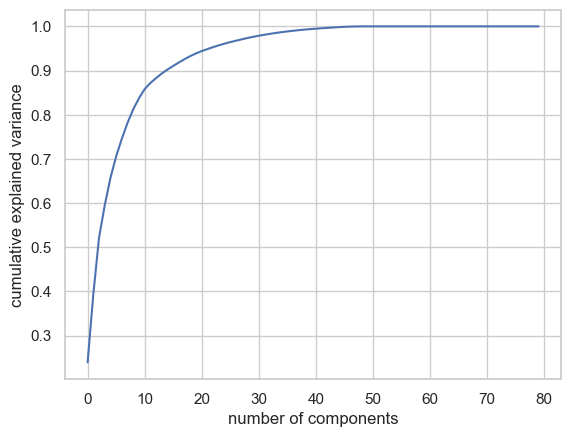

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [27]:
# Usando PCA

pca = PCA(n_components= 0.95)
pca.fit(X_train)

X_pca_train = pca.transform(X_train)
pca

PCA(n_components=0.95)

In [28]:
# Criando novo modelo usando dados do PCA

model = MLPClassifier()

clf_pca = GridSearchCV(model, parameters)

clf_pca.fit(X_pca_train, y_train)

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterati

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_netw

C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\neural_netw

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [2, 4, 8, 16, 32, 64],
                         'learning_rate_init': [0.005, 0.01, 0.02, 0.05],
                         'random_state': [0],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [29]:
GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [2, 4, 8, 16, 32, 64],
                         'learning_rate_init': [0.005, 0.01, 0.02, 0.05],
                         'random_state': [0],
                         'solver': ['lbfgs', 'sgd', 'adam']})

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [2, 4, 8, 16, 32, 64],
                         'learning_rate_init': [0.005, 0.01, 0.02, 0.05],
                         'random_state': [0],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [30]:
# Avaliando resultado no modelo aplicando PCA

clf_pca.score(X_pca_train,y_train)

1.0

In [31]:
# Verificando o score do modelo sobre a base de teste
X_pca_test = pca.transform(X_test)

clf_pca.score(X_pca_test, y_test)

1.0

In [32]:
# Quais parâmetros foram utilizados pelo GridSearchCV no PCA

clf_pca.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 64,
 'learning_rate_init': 0.02,
 'random_state': 0,
 'solver': 'sgd'}

In [33]:
# Dados do modelo anterior sem o uso do PCA

clf.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 16,
 'learning_rate_init': 0.005,
 'random_state': 0,
 'solver': 'lbfgs'}

CONCLUSÃO: Ao avaliar a aplicação do PCA, constatamos que os valores para teste e treino permaneceram os mesmos. 

Contudo ocorreu um aumento do numero da hidden_layer_sizes de 16 para 64 (ela determina o número de neurônios em cada camada oculta da rede neural) 

Houve, também, um aumento da learning_rate_init de 0.005 para 0.02 (Define a taxa de aprendizado inicial a ser utilizada pelo algoritmo de treinamento)
